In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 讀取 CSV 文件
df = pd.read_csv('/Users/ccit0915/Desktop/kaggle/Forecasting Sticker Sales/train.csv', encoding='utf-8')
df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [6]:
import pandas as pd 

# 檢查資料型態和缺失值
print(df.info())

# 檢查數值型資料的統計描述
print(df.describe())

# 檢查各欄位的缺失值
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None
                  id       num_sold
count  230130.000000  221259.000000
mean   115064.500000     752.527382
std     66432.953062     690.165445
min         0.000000       5.000000
25%     57532.250000     219.000000
50%    115064.500000     605.000000
75%    172596.750000    1114.000000
max    230129.000000    5939.000000
id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


In [8]:
missing_ratio = df['num_sold'].isnull().mean()
print(f"'num_sold' 缺失值比例: {missing_ratio:.2%}")

'num_sold' 缺失值比例: 3.85%


In [10]:
# 使用中位數填補缺失值
median_value = df['num_sold'].median()
df['num_sold'].fillna(median_value, inplace=True)

# 確認是否還有缺失值
missing_ratio = df['num_sold'].isnull().mean()
print(f"'num_sold' 欄位缺失值比例: {missing_ratio:.2%}")

'num_sold' 欄位缺失值比例: 0.00%


/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_15759/2516093660.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num_sold'].fillna(median_value, inplace=True)


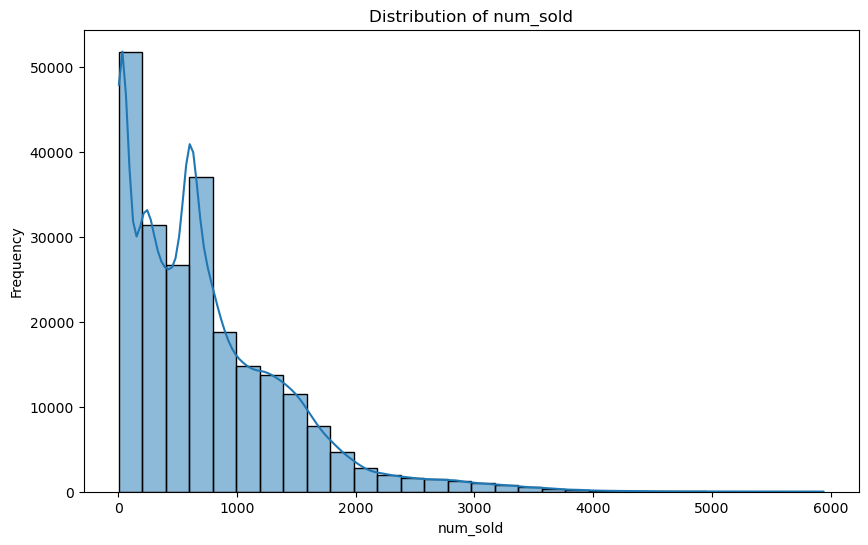

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 df 是已經載入的 DataFrame 並且包含 'date' 和 'num_sold' 欄位
# 轉換 'date' 欄位為 datetime 格式
df['date'] = pd.to_datetime(df['date'])

# 從 'date' 欄位提取年、月、日特徵
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# 畫出 'num_sold' 變數的數據分佈
plt.figure(figsize=(10, 6))
sns.histplot(df['num_sold'], kde=True, bins=30)
plt.title('Distribution of num_sold')
plt.xlabel('num_sold')
plt.ylabel('Frequency')
plt.show()

In [14]:
df

,id,date,country,store,product,num_sold,year,month,day
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,605.0,2010,1,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1
...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,31
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,31


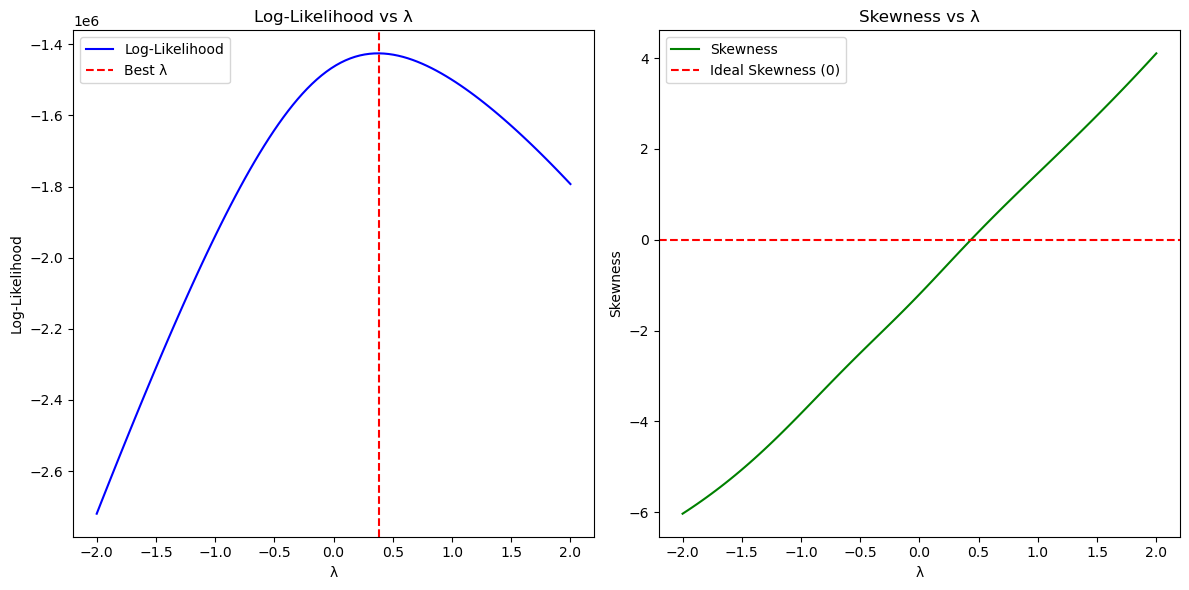

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.special import boxcox1p

# 測試的 λ 值範圍
lambda_values = np.linspace(-2, 2, 100)

# 記錄對數似然值和偏態
log_likelihoods = []
skewness_values = []

# 對目標變數進行 Box-Cox 轉換
y = df['num_sold'].values
y = y[y > 0]  # Box-Cox 要求數據為正數

# 算對數似然值的公式
def compute_log_likelihood(y, transformed_y, lam):
    n = len(y)
    if lam == 0:
        return -n / 2 * np.log(np.var(transformed_y))  # 使用自然對數
    else:
        return (lam - 1) * np.sum(np.log(y)) - n / 2 * np.log(np.var(transformed_y))

# 遍歷不同的 λ 值進行計算
for lam in lambda_values:
    # Box-Cox 轉換
    if lam == 0:
        transformed_y = np.log(y)  # 當 λ = 0 時，Box-Cox 是對數轉換
    else:
        transformed_y = boxcox1p(y - 1, lam)  # 使用 boxcox1p 來處理數據偏移量
    
    # 計算對數似然值
    llf = compute_log_likelihood(y, transformed_y, lam)
    log_likelihoods.append(llf)
    
    # 計算偏態
    skewness_values.append(skew(transformed_y))

# 繪製曲線
plt.figure(figsize=(12, 6))

# 1. 繪製對數似然值曲線
plt.subplot(1, 2, 1)
plt.plot(lambda_values, log_likelihoods, label='Log-Likelihood', color='blue')
plt.axvline(lambda_values[np.argmax(log_likelihoods)], color='red', linestyle='--', label='Best λ')
plt.xlabel('λ')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs λ')
plt.legend()

# 2. 繪製偏態曲線
plt.subplot(1, 2, 2)
plt.plot(lambda_values, skewness_values, label='Skewness', color='green')
plt.axhline(0, color='red', linestyle='--', label='Ideal Skewness (0)')
plt.xlabel('λ')
plt.ylabel('Skewness')
plt.title('Skewness vs λ')
plt.legend()

plt.tight_layout()
plt.show()

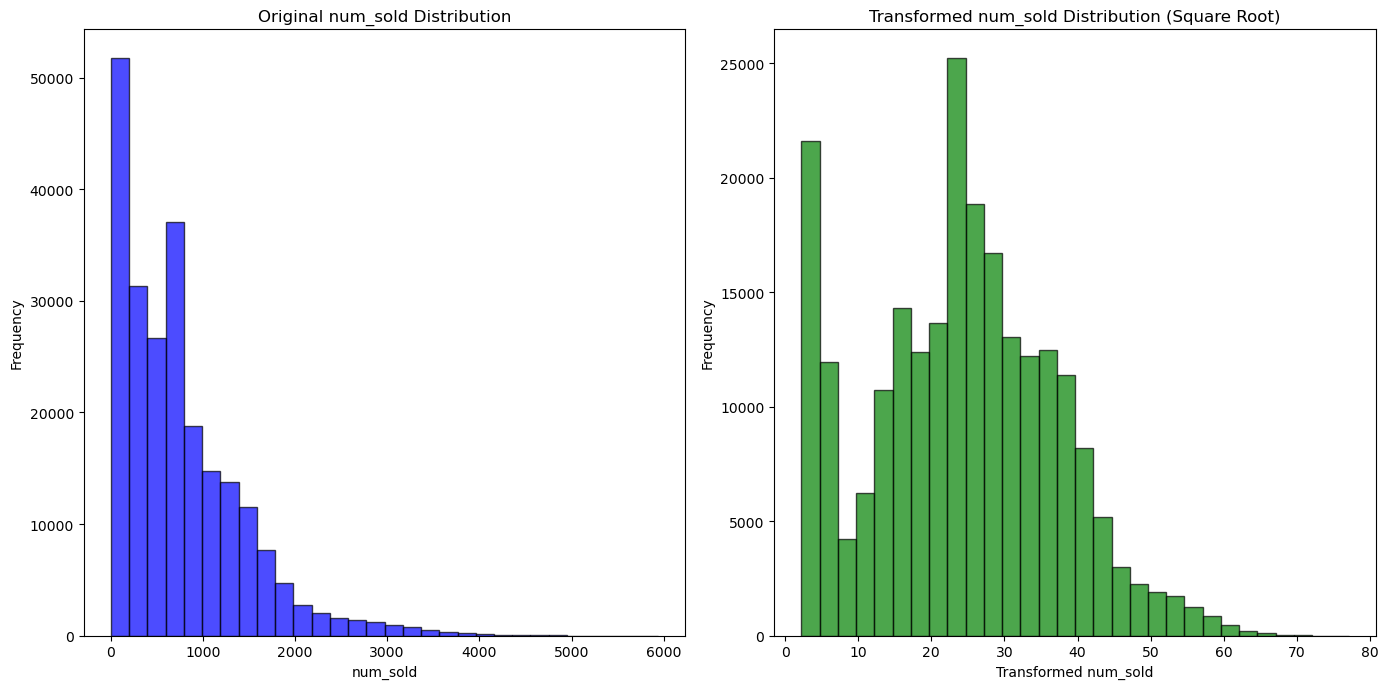

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 取得 num_sold 的數據
y = df['num_sold'].values
y = y[y > 0]  # 確保數據為正數，因為平方根轉換要求數據大於零

# 進行平方根轉換（λ = 0.5）
transformed_y = np.sqrt(y)

# 繪製對照圖：轉換前與轉換後的分佈
plt.figure(figsize=(14, 7))

# 轉換前的數據分佈
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Original num_sold Distribution')
plt.xlabel('num_sold')
plt.ylabel('Frequency')

# 轉換後的數據分佈
plt.subplot(1, 2, 2)
plt.hist(transformed_y, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Transformed num_sold Distribution (Square Root)')
plt.xlabel('Transformed num_sold')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
df.drop(columns=['date'], inplace=True)

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

# 對 num_sold 進行平方根轉換
df['num_sold_transformed'] = np.sqrt(df['num_sold'])

# 定義 X 和 Y
X = df[['country', 'store', 'product', 'year', 'month', 'day']]  # 特徵
Y = df['num_sold_transformed']  # 目標變數

# 切割數據為訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 顯示切割後的訓練集和測試集大小
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 184104 samples
Testing data size: 46026 samples


In [39]:
from sklearn.model_selection import KFold
import numpy as np

def target_encode_cv(X, y, feature, n_splits=5):
    """
    使用交叉驗證計算目標編碼，避免數據洩漏。
    
    Args:
        X (pd.DataFrame): 特徵數據集。
        y (pd.Series): 目標變數。
        feature (str): 要進行目標編碼的特徵列名稱。
        n_splits (int): KFold 的分割數量。
    
    Returns:
        pd.Series: 目標編碼後的特徵列。
        dict: 訓練集的目標編碼映射（用於測試集）。
        float: 全局目標平均值（處理新類別用）。
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encoded_feature = np.zeros(len(X))
    overall_mean = y.mean()
    encoding_map = {}
    
    for train_idx, val_idx in kf.split(X):
        train_data, val_data = X.iloc[train_idx], X.iloc[val_idx]
        train_target, val_target = y.iloc[train_idx], y.iloc[val_idx]
        
        # 計算當前訓練折的目標平均值
        fold_encoding_map = train_data.groupby(feature)[train_target.name].mean().to_dict()
        encoding_map.update(fold_encoding_map)  # 更新整體的映射
        
        # 對驗證折進行目標編碼
        val_encoded = val_data[feature].map(fold_encoding_map).fillna(overall_mean)
        encoded_feature[val_idx] = val_encoded
    
    return pd.Series(encoded_feature, index=X.index), encoding_map, overall_mean

def target_encode_test_cv(X, feature, encoding_map, default_value):
    """
    使用訓練集生成的目標編碼映射對測試集進行編碼。
    
    Args:
        X (pd.DataFrame): 測試數據集。
        feature (str): 要進行目標編碼的特徵列名稱。
        encoding_map (dict): 訓練集生成的目標編碼映射。
        default_value (float): 新類別的默認目標平均值。
    
    Returns:
        pd.Series: 測試集目標編碼後的特徵列。
    """
    return X[feature].map(encoding_map).fillna(default_value)

# 1. 保留原始的 'product' 特徵
X_train_product = X_train[['product']].reset_index(drop=True)
X_test_product = X_test[['product']].reset_index(drop=True)

# 合併訓練集和測試集進行熱點編碼
combined = pd.concat([X_train[['country', 'store']], X_test[['country', 'store']]], axis=0).reset_index(drop=True)
combined_encoded = pd.get_dummies(combined, drop_first=True)
X_train_encoded = combined_encoded.iloc[:X_train.shape[0], :].reset_index(drop=True)
X_test_encoded = combined_encoded.iloc[X_train.shape[0]:, :].reset_index(drop=True)

# 2. 基於訓練集和目標變數計算交叉驗證目標編碼
train_with_target = X_train_encoded.join(X_train_product).join(Y_train.rename('num_sold_transformed')).reset_index(drop=True)
X_train_encoded['product_encoded'], encoding_map, overall_mean = target_encode_cv(
    train_with_target, 
    train_with_target['num_sold_transformed'], 
    feature='product'
)

# 3. 對測試集應用目標編碼
test_with_target = X_test_encoded.join(X_test_product).reset_index(drop=True)
X_test_encoded['product_encoded'] = target_encode_test_cv(
    test_with_target,
    feature='product',
    encoding_map=encoding_map,
    default_value=overall_mean
)

# 合併日期特徵進入最終特徵集
X_train_final = pd.concat([X_train_encoded, X_train[['year', 'month', 'day']].reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test[['year', 'month', 'day']].reset_index(drop=True)], axis=1)

# 輸出結果
print(f"Training data size after encoding: {X_train_final.shape[0]} samples, {X_train_final.shape[1]} features")
print(f"Testing data size after encoding: {X_test_final.shape[0]} samples, {X_test_final.shape[1]} features")

Training data size after encoding: 184104 samples, 11 features
Testing data size after encoding: 46026 samples, 11 features


In [41]:
X_train_final

,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_encoded,year,month,day
0,False,False,False,True,False,False,False,24.449038,2012,7,13
1,False,True,False,False,False,True,False,24.310339,2011,5,8
2,False,False,False,False,False,False,True,24.372283,2011,5,8
3,False,False,True,False,False,False,False,24.510075,2016,3,13
4,False,True,False,False,False,False,False,24.299124,2013,5,4
...,...,...,...,...,...,...,...,...,...,...,...
184099,False,False,False,False,True,True,False,24.658391,2013,8,24
184100,False,False,False,False,False,True,False,24.550830,2013,2,26
184101,False,False,False,False,True,False,True,24.539964,2014,1,5
184102,False,False,False,False,True,False,False,24.637304,2014,6,20


In [43]:
X_test_final

,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_encoded,year,month,day
0,False,False,False,False,True,False,False,24.296818,2010,9,27
1,True,False,False,False,False,False,True,24.515783,2012,11,17
2,False,False,False,False,False,False,True,24.228311,2014,4,23
3,False,True,False,False,False,False,True,24.658391,2015,11,27
4,False,False,False,False,False,True,False,24.228311,2014,8,17
...,...,...,...,...,...,...,...,...,...,...,...
46021,False,False,False,False,False,False,True,24.296818,2011,8,26
46022,False,False,False,True,False,False,False,24.296818,2015,6,14
46023,False,False,False,False,False,True,False,24.453177,2016,5,21
46024,False,False,False,True,False,False,True,24.296818,2016,11,27


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# 設置隨機森林回歸器，並直接設定最佳參數
best_rf = RandomForestRegressor(
    max_depth=20,              # 樹的最大深度
    min_samples_split=10,      # 分裂節點所需的最小樣本數
    min_samples_leaf=4,        # 末端葉子所需的最小樣本數
    n_estimators=300,          # 樹的數量
    random_state=42            # 隨機狀態
)

# 設置 XGBoost 模型
best_xgb = xgb.XGBRegressor(
    max_depth=20,              # 樹的最大深度
    min_child_weight=10,       # 分裂節點所需的最小樣本數
    n_estimators=300,          # 樹的數量
    random_state=42            # 隨機狀態
)

# 設置 LightGBM 模型
best_lgb = lgb.LGBMRegressor(
    max_depth=20,              # 樹的最大深度
    min_child_samples=10,      # 分裂節點所需的最小樣本數
    n_estimators=300,          # 樹的數量
    random_state=42            # 隨機狀態
)

# 訓練模型
best_rf.fit(X_train_final, Y_train)
best_xgb.fit(X_train_final, Y_train)
best_lgb.fit(X_train_final, Y_train)

# 訓練集預測
train_pred_rf = best_rf.predict(X_train_final)
train_pred_xgb = best_xgb.predict(X_train_final)
train_pred_lgb = best_lgb.predict(X_train_final)

# 測試集預測（假設你有測試集 X_test_final 和 Y_test）
test_pred_rf = best_rf.predict(X_test_final)
test_pred_xgb = best_xgb.predict(X_test_final)
test_pred_lgb = best_lgb.predict(X_test_final)

# 計算訓練集和測試集的 MSE、MAE 和 R²
train_mse_rf = mean_squared_error(Y_train, train_pred_rf)
train_mae_rf = mean_absolute_error(Y_train, train_pred_rf)
train_r2_rf = r2_score(Y_train, train_pred_rf)

train_mse_xgb = mean_squared_error(Y_train, train_pred_xgb)
train_mae_xgb = mean_absolute_error(Y_train, train_pred_xgb)
train_r2_xgb = r2_score(Y_train, train_pred_xgb)

train_mse_lgb = mean_squared_error(Y_train, train_pred_lgb)
train_mae_lgb = mean_absolute_error(Y_train, train_pred_lgb)
train_r2_lgb = r2_score(Y_train, train_pred_lgb)

test_mse_rf = mean_squared_error(Y_test, test_pred_rf)
test_mae_rf = mean_absolute_error(Y_test, test_pred_rf)
test_r2_rf = r2_score(Y_test, test_pred_rf)

test_mse_xgb = mean_squared_error(Y_test, test_pred_xgb)
test_mae_xgb = mean_absolute_error(Y_test, test_pred_xgb)
test_r2_xgb = r2_score(Y_test, test_pred_xgb)

test_mse_lgb = mean_squared_error(Y_test, test_pred_lgb)
test_mae_lgb = mean_absolute_error(Y_test, test_pred_lgb)
test_r2_lgb = r2_score(Y_test, test_pred_lgb)

# 顯示結果
print("訓練集 RandomForest MSE:", train_mse_rf)
print("訓練集 RandomForest MAE:", train_mae_rf)
print("訓練集 RandomForest R²:", train_r2_rf)

print("訓練集 XGBoost MSE:", train_mse_xgb)
print("訓練集 XGBoost MAE:", train_mae_xgb)
print("訓練集 XGBoost R²:", train_r2_xgb)

print("訓練集 LightGBM MSE:", train_mse_lgb)
print("訓練集 LightGBM MAE:", train_mae_lgb)
print("訓練集 LightGBM R²:", train_r2_lgb)

print("測試集 RandomForest MSE:", test_mse_rf)
print("測試集 RandomForest MAE:", test_mae_rf)
print("測試集 RandomForest R²:", test_r2_rf)

print("測試集 XGBoost MSE:", test_mse_xgb)
print("測試集 XGBoost MAE:", test_mae_xgb)
print("測試集 XGBoost R²:", test_r2_xgb)

print("測試集 LightGBM MSE:", test_mse_lgb)
print("測試集 LightGBM MAE:", test_mae_lgb)
print("測試集 LightGBM R²:", test_r2_lgb)

# 比較結果，取最高 R²
best_model = None
best_r2 = max(test_r2_rf, test_r2_xgb, test_r2_lgb)

if best_r2 == test_r2_rf:
    best_model = "RandomForest"
elif best_r2 == test_r2_xgb:
    best_model = "XGBoost"
else:
    best_model = "LightGBM"

print(f"最佳模型為: {best_model}，R²: {best_r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 11
[LightGBM] [Info] Start training from score 24.167474
訓練集 RandomForest MSE: 2.303443753398436
訓練集 RandomForest MAE: 0.9134770984729491
訓練集 RandomForest R²: 0.9858183721659688
訓練集 XGBoost MSE: 0.005923467866927965
訓練集 XGBoost MAE: 0.051544462764868335
訓練集 XGBoost R²: 0.999963530945068
訓練集 LightGBM MSE: 3.1874805859921795
訓練集 LightGBM MAE: 1.1489509603818824
訓練集 LightGBM R²: 0.9803756165818902
測試集 RandomForest MSE: 3.434001485499218
測試集 RandomForest MAE: 1.127753577238193
測試集 RandomForest R²: 0.9788653087049385
測試集 XGBoost MSE: 3.551539930782399
測試集 XGBoost MAE: 1

In [45]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 定義參數搜尋範圍
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [1, 5, 10]
}

# 設置基礎模型
rf = RandomForestRegressor(random_state=42)

# 設置 GridSearchCV（可以根據需求調整 cv 和 scoring）
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

# 記錄開始時間
start_time = time.time()

# 執行網格搜尋
grid_search.fit(X_train_final, Y_train)

# 記錄結束時間並計算耗時
end_time = time.time()
training_time = end_time - start_time

# 使用最佳模型進行預測
best_rf = grid_search.best_estimator_

# 預測
train_pred = best_rf.predict(X_train_final)
test_pred = best_rf.predict(X_test_final)

# 評估指標
train_mse = mean_squared_error(Y_train, train_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
train_r2 = r2_score(Y_train, train_pred)

test_mse = mean_squared_error(Y_test, test_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
test_r2 = r2_score(Y_test, test_pred)

# 顯示結果
print("最佳參數組合:", grid_search.best_params_)
print("網格搜尋與訓練時間: {:.2f} 秒".format(training_time))
print("訓練集 MSE:", train_mse)
print("訓練集 MAE:", train_mae)
print("訓練集 R²:", train_r2)
print("測試集 MSE:", test_mse)
print("測試集 MAE:", test_mae)
print("測試集 R²:", test_r2)

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


最佳參數組合: {'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}
網格搜尋與訓練時間: 2554.22 秒
訓練集 MSE: 2.627892606770781
訓練集 MAE: 0.9723838947171813
訓練集 R²: 0.9838208357021778
測試集 MSE: 3.410341035942245
測試集 MAE: 1.128143350530645
測試集 R²: 0.9790109278316047


Feature Importances (sorted):
country_Finland: 0.0024
day: 0.0041
country_Singapore: 0.0057
month: 0.0110
year: 0.0156
country_Italy: 0.0203
store_Premium Sticker Mart: 0.0561
store_Stickers for Less: 0.0659
country_Norway: 0.0799
product_encoded: 0.3613
country_Kenya: 0.3776


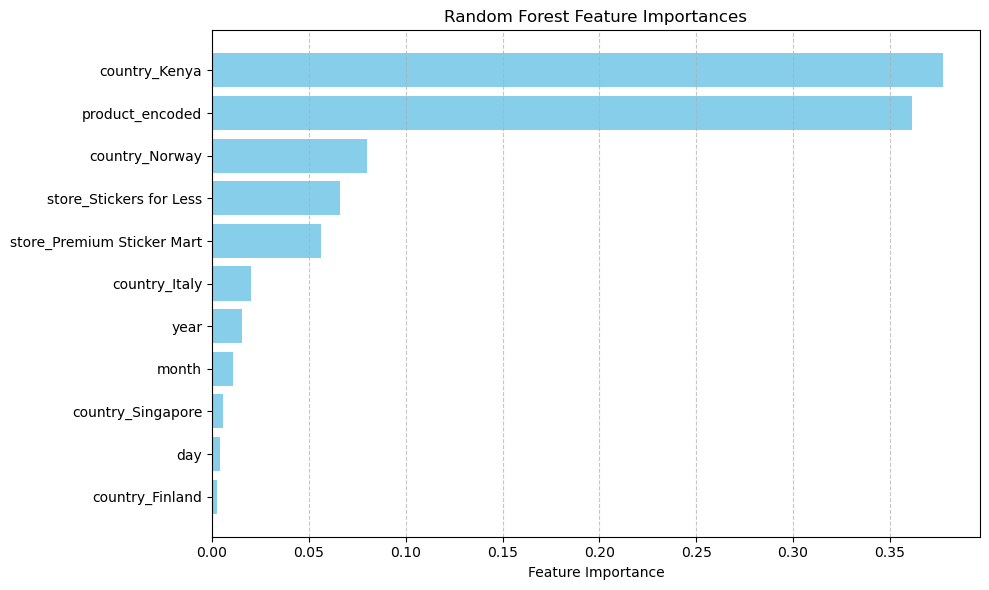

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 獲取特徵重要性和特徵名稱
feature_importances = best_rf.feature_importances_
feature_names = X_train_final.columns
sorted_idx = np.argsort(feature_importances)

# 印出每個特徵的重要性
print("Feature Importances (sorted):")
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

# 繪製水平條形圖
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 假設已經訓練好的最佳隨機森林模型
# best_rf 已經是訓練好的模型，不再進行訓練
# 您將只在每個折疊的測試集上進行預測並計算評估指標

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold 交叉驗證

train_mse_list = []
train_mae_list = []
train_r2_list = []

test_mse_list = []
test_mae_list = []
test_r2_list = []

# 開始 KFold 交叉驗證
for train_idx, val_idx in kf.split(X_train_final):
    X_train_fold, X_val_fold = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
    y_train_fold, y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]
    
    # 訓練好的模型直接進行預測，不需要重新訓練
    train_pred = best_rf.predict(X_train_fold)
    test_pred = best_rf.predict(X_val_fold)
    
    # 計算訓練集和測試集的 MSE、MAE 和 R²
    train_mse = mean_squared_error(y_train_fold, train_pred)
    train_mae = mean_absolute_error(y_train_fold, train_pred)
    train_r2 = r2_score(y_train_fold, train_pred)

    test_mse = mean_squared_error(y_val_fold, test_pred)
    test_mae = mean_absolute_error(y_val_fold, test_pred)
    test_r2 = r2_score(y_val_fold, test_pred)

    # 保存每次折疊的結果
    train_mse_list.append(train_mse)
    train_mae_list.append(train_mae)
    train_r2_list.append(train_r2)
    
    test_mse_list.append(test_mse)
    test_mae_list.append(test_mae)
    test_r2_list.append(test_r2)

# 計算每個評估指標的平均值和標準差
print(f"訓練集 MSE: 平均 = {np.mean(train_mse_list):.4f}, 標準差 = {np.std(train_mse_list):.4f}")
print(f"訓練集 MAE: 平均 = {np.mean(train_mae_list):.4f}, 標準差 = {np.std(train_mae_list):.4f}")
print(f"訓練集 R²: 平均 = {np.mean(train_r2_list):.4f}, 標準差 = {np.std(train_r2_list):.4f}")

print(f"測試集 MSE: 平均 = {np.mean(test_mse_list):.4f}, 標準差 = {np.std(test_mse_list):.4f}")
print(f"測試集 MAE: 平均 = {np.mean(test_mae_list):.4f}, 標準差 = {np.std(test_mae_list):.4f}")
print(f"測試集 R²: 平均 = {np.mean(test_r2_list):.4f}, 標準差 = {np.std(test_r2_list):.4f}")

訓練集 MSE: 平均 = 2.3034, 標準差 = 0.0107
訓練集 MAE: 平均 = 0.9135, 標準差 = 0.0019
訓練集 R²: 平均 = 0.9858, 標準差 = 0.0001
測試集 MSE: 平均 = 2.3034, 標準差 = 0.0427
測試集 MAE: 平均 = 0.9135, 標準差 = 0.0077
測試集 R²: 平均 = 0.9858, 標準差 = 0.0003


In [88]:
import pandas as pd

#讀取新的測試資料
test_data = pd.read_csv('/Users/ccit0915/Desktop/kaggle/Forecasting Sticker Sales/test.csv')

In [90]:
test_data

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 轉換 'date' 欄位為 datetime 格式
test_data['date'] = pd.to_datetime(test_data['date'])

# 從 'date' 欄位提取年、月、日特徵
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day

In [96]:
# 1. 保留原始的 'product' 特徵
test_data_product = test_data[['product']].reset_index(drop=True)

# 合併測試集中的 'country' 和 'store' 特徵進行熱點編碼
combined_test = pd.concat([test_data[['country', 'store']]], axis=0).reset_index(drop=True)
combined_test_encoded = pd.get_dummies(combined_test, drop_first=True)
X_test_encoded = combined_test_encoded.reset_index(drop=True)

# 2. 基於訓練集和目標變數計算交叉驗證目標編碼
test_with_target = X_test_encoded.join(test_data_product).reset_index(drop=True)

# 使用之前生成的 `encoding_map` 和 `overall_mean` 進行目標編碼
X_test_encoded['product_encoded'] = target_encode_test_cv(
    test_with_target,
    feature='product',
    encoding_map=encoding_map,
    default_value=overall_mean
)

# 合併日期特徵進入最終特徵集
X_test_final = pd.concat([X_test_encoded, test_data[['year', 'month', 'day']].reset_index(drop=True)], axis=1)

# 輸出結果
print(f"Test data size after encoding: {X_test_final.shape[0]} samples, {X_test_final.shape[1]} features")

Test data size after encoding: 98550 samples, 11 features


In [108]:
# 保留 ID 欄位
X_test_final = test_data[['id']].reset_index(drop=True).join(X_test_final, how='left')

# 逆向平方根轉換
predictions_reversed = predictions ** 2

# 將結果取整數
predictions_final = np.round(predictions_reversed).astype(int)

# 新增到 X_test_final 的 'num_sold' 欄位
X_test_final['num_sold'] = predictions_final

# 輸出最終結果到 CSV 檔案
output_file = '/Users/ccit0915/Desktop/kaggle/Forecasting Sticker Sales/predicted_sales.csv'
X_test_final.to_csv(output_file, index=False)

print(f"預測結果已儲存至 {output_file}")

預測結果已儲存至 /Users/ccit0915/Desktop/kaggle/Forecasting Sticker Sales/predicted_sales.csv


In [110]:
# 僅保留 'ID' 和 'num_sold' 欄位並輸出
output_file = '/Users/ccit0915/Desktop/kaggle/Forecasting Sticker Sales/predicted_sales_only_id_and_num_sold.csv'
X_test_final[['id', 'num_sold']].to_csv(output_file, index=False)

print(f"預測結果（僅id與num_sold）已儲存至 {output_file}")

預測結果（僅id與num_sold）已儲存至 /Users/ccit0915/Desktop/kaggle/Forecasting Sticker Sales/predicted_sales_only_id_and_num_sold.csv
